In [1]:
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import numpy as np
from scipy import io
import os

1
0
0
1
1
2
2
1
2
2
0
1
0
1
0
0
1
2
2
1


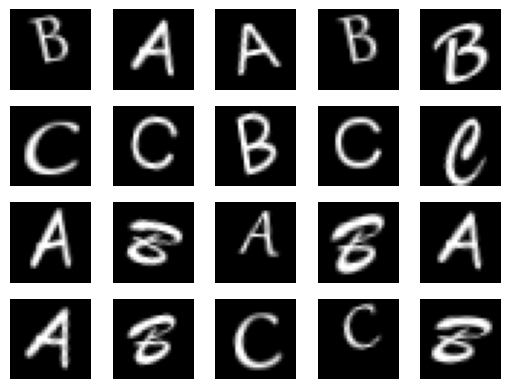

In [2]:
traindir = os.getcwd() + '/' + 'lettersTrainSet.mat'
testdir = os.getcwd() + '/' + 'lettersTestSet.mat'
letters_train_mat = io.loadmat(traindir)
letters_test_mat = io.loadmat(testdir)
XTrain = letters_train_mat['XTrain']
TTrain = letters_train_mat['TTrain_cell']
XTest = letters_test_mat['XTest']
TTest = letters_test_mat['TTest_cell']

# By default, Keras expects data in form (batch, height, width, channels) 
x_train = np.squeeze(np.transpose(XTrain,axes=[3,0,1,2]))
x_test = np.squeeze(np.transpose(XTest,axes=[3,0,1,2]))

nx, ny = x_train[0].shape

classes = np.unique(TTrain)
y_train_label = np.zeros_like(TTrain)
y_test_label = np.zeros_like(TTest)
for nc in range(len(classes)):
    y_train_label[TTrain == classes[nc]] = nc
    y_test_label[TTest == classes[nc]] = nc

y_train_label = y_train_label.reshape(-1)
y_test_label = y_test_label.reshape(-1)

# Plot a random selection of letters
perm = np.random.permutation(1500)[:20]
fig,axs = plt.subplots(4,5)
axs = axs.reshape(-1)
for j in range(len(axs)):
    axs[j].imshow(x_train[perm[j],:,:],cmap='gray')
    axs[j].axis('off')
    print(y_train_label[perm[j]])

In [3]:
num_classes=3

y_train = keras.utils.to_categorical(y_train_label, num_classes)
y_test = keras.utils.to_categorical(y_test_label, num_classes)

In [4]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, Conv2D
from tensorflow.keras.optimizers import SGD, Adam

model = keras.models.Sequential()
model.add(Conv2D(filters=16, kernel_size=5, strides=(3, 3), activation='relu', input_shape=(nx, ny, 1)))
model.add(Flatten(input_shape=(nx,ny)))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes))

model.summary()


/Users/zhanhe.huang/anaconda3/envs/MATH122A/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/zhanhe.huang/anaconda3/envs/MATH122A/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 8, 8, 16)       │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │        51,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,819 (202.42 KB)

 Trainable params: 51,819 (202.42 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
learning_rate=0.5
batch_size = 100
epochs=15

model.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              optimizer=Adam(),
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6371 - loss: 0.9417 - val_accuracy: 0.8547 - val_loss: 0.5834
Epoch 2/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9449 - loss: 0.3498 - val_accuracy: 0.8940 - val_loss: 0.3017
Epoch 3/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9949 - loss: 0.0894 - val_accuracy: 0.9000 - val_loss: 0.2609
Epoch 4/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9983 - loss: 0.0256 - val_accuracy: 0.8900 - val_loss: 0.2618
Epoch 5/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0120 - val_accuracy: 0.8707 - val_loss: 0.2918
Epoch 6/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0076 - val_accuracy: 0.9073 - val_loss: 0.2355
Epoch 7/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0060 - val_accuracy: 0.8913 - val_loss: 0.2603
Epoch 8/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 0.8960 - val_loss

In [6]:
YPredict = np.argmax(model.predict(x_test),axis=1)
# argmax reverses the one-hot encoding scheme

accuracy = np.sum(YPredict == y_test_label)/len(y_test_label)
print("Accuracy: ", accuracy, " on ", len(y_test_label), " validation images and",len(y_train_label)," training images.")
  

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Accuracy:  0.8866666666666667  on  1500  validation images and 1500  training images.
